In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [2]:
data_raw = pd.read_csv('./files_for_lab/customer_churn.csv')
data_raw = data_raw.drop_duplicates()
data_raw = data_raw.reset_index(drop=True)
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data =  data_raw[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
data.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [5]:
X = data.drop('Churn',axis = 1)
y = data['Churn']
y = y.replace('Yes', 1)
y = y.replace('No', 0)

In [6]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

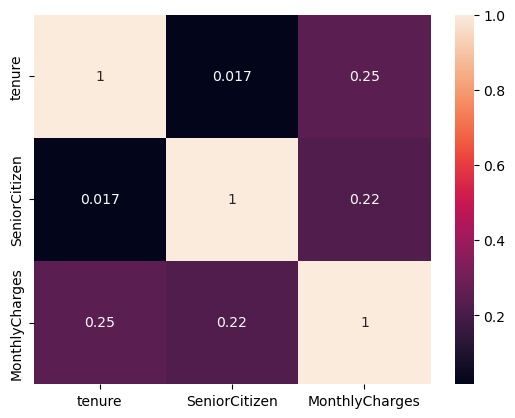

In [7]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
y_train.isna().sum()
y_test.isna().sum()

0

In [10]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,-0.340191,-0.435476,-0.514314
6397,0.883210,2.296336,0.017840
6043,-1.196572,-0.435476,-0.819594
5309,1.168670,-0.435476,-1.483535
3000,-0.829552,-0.435476,0.658427


In [11]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


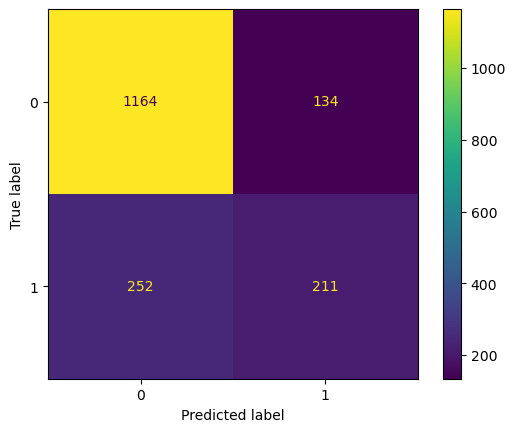

In [13]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

The model has a big accuraccy because we have a big samples of true positives and true negatives, but lacks definition to spot false positive and false negative values.

<br><h3>SMOTE<h3>

In [14]:
sm = SMOTE(random_state=100,k_neighbors=3) #neighbors used to try to predict the class.
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


In [15]:
y_train_SMOTE.value_counts()

0    3876
1    3876
Name: Churn, dtype: int64

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


Improved recall but decreased precission (as we have more true negative values but less true positive ones). We have a considerable increase in false positives (3 times more), but also reduced false negatives.<br> Overall, the model has not changed much (Kappa score is the same) but other metrics have improved as F1 and recall.

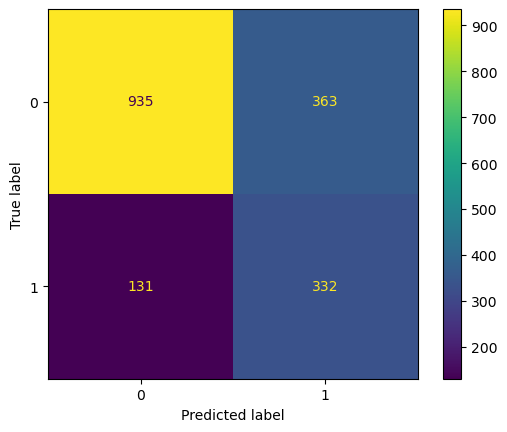

In [17]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

<br><h2>We will now check the whole dataframe, and encode categorical values except for the customer ID - we will still have the index to refer back to the original DF.<h2>

In [18]:
def data_standard_headers(df):
    df = df.drop_duplicates()
    df = df.reset_index(drop = True)
    cols = []
    for col in df.columns:
        cols.append(col.lower().replace(' ', '_'))
    df.columns = cols
    return df

In [19]:
data_raw = data_standard_headers(data_raw)
data_raw = data_raw.drop([data_raw.columns[0]], axis=1)

In [20]:
data_raw.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data_cat = data_raw.select_dtypes(object)

In [22]:
data_cat

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [23]:
data_cat['totalcharges'].value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

There are 11 values on total charges with an empty space. Multiplying monthly charges by the tenure doesn't give the exact same result on total charges for the values we have info, so I will drop these 11 rows as the total dataset is big enough. I will work with the raw dataset and do again the separation in categoricals and numericals.

We will check the rest of the columns of the Dataframe first to see if there are any Na's or strange values like in this previous case.

In [24]:
def column_checker(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(dropna=False), '\n')
        

In [25]:
column_checker(data_raw)

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

seniorcitizen 
 0    5901
1    1142
Name: seniorcitizen, dtype: int64 

partner 
 No     3641
Yes    3402
Name: partner, dtype: int64 

dependents 
 No     4933
Yes    2110
Name: dependents, dtype: int64 

tenure 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

phoneservice 
 Yes    6361
No      682
Name: phoneservice, dtype: int64 

multiplelines 
 No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64 

internetservice 
 Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64 

onlinesecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64 

onlinebackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: online

No other strange values. We will then proceed to remove the 11 rows with no info on totalcharges column.

In [26]:
data = data_raw[data_raw.totalcharges != ' ']
print('Original dataframe shape: \n', data_raw.shape)
print('\nNew dataset after dropping the 11 rows with no info on totalcharges column:\n', data.shape)
print('\n11 target rows dropped successfully')

Original dataframe shape: 
 (7043, 20)

New dataset after dropping the 11 rows with no info on totalcharges column:
 (7032, 20)

11 target rows dropped successfully


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


However, totalcharges is still an object, we need to convert it to float.

In [28]:
data = data.astype({"totalcharges": float})

In [29]:
data_cat = data.select_dtypes(object)
data_num = data.select_dtypes(include = np.number)

In [30]:
data_cat_encoded = pd.get_dummies(data_cat)
display(data_cat_encoded.head())
display(data_cat_encoded.shape)

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,...,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1


(7032, 43)

In [31]:
final_data = pd.concat([data_num, data_cat_encoded], axis=1)
display(final_data.head())
display(final_data.shape)

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


(7032, 47)

Now we can finally do the X/y split and build the regression model.

In [32]:
final_data.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_Female', 'gender_Male', 'partner_No', 'partner_Yes',
       'dependents_No', 'dependents_Yes', 'phoneservice_No',
       'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', '

In [33]:
X2 = final_data.drop('churn_Yes',axis = 1)
y2 = final_data['churn_Yes']
X2 = X2.drop('churn_No', axis = 1)
X2 = X2.drop('partner_No',axis = 1)
X2 = X2.drop('paperlessbilling_No', axis = 1)
X2 = X2.drop('dependents_No', axis = 1)
X2 = X2.drop('phoneservice_No', axis = 1)

We will be keeping only churn yes, as it contains the same info coded in churn no but oppositen values. We will have to drop all NO columns as they will be tightly correlated to their YES counterparts.

In [34]:
X2.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_Female', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paperlessbilling_Yes',
       'paymentmethod_Bank transfe

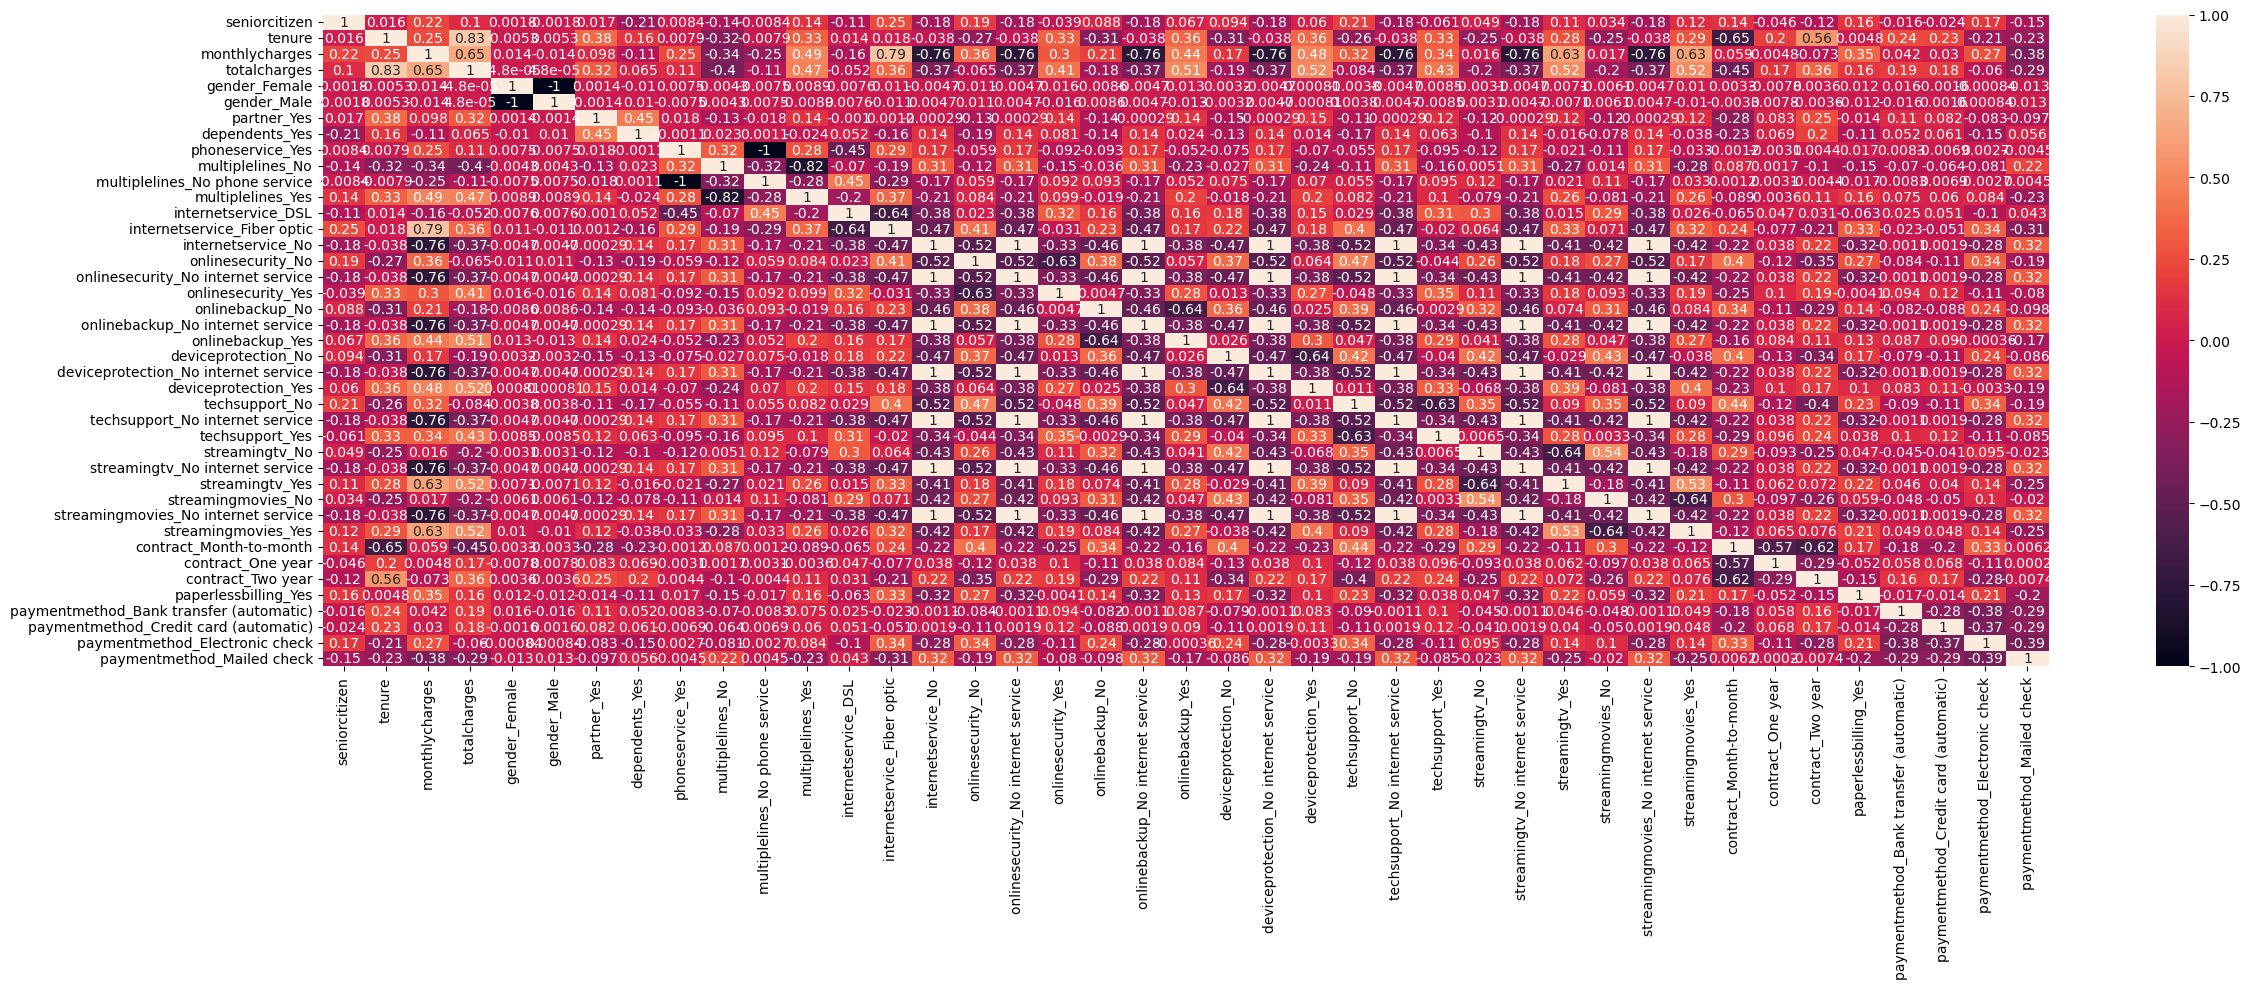

In [35]:
correlations_matrix = X2.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlations_matrix, annot=True)
plt.tight_layout()
plt.show()

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

In [37]:
y2_train.isna().sum()
y2_test.isna().sum()

0

In [38]:
transformer = StandardScaler()
transformer.fit(X2_train)

X2_train_scaled_np = transformer.transform(X2_train)
X2_train_scaled = pd.DataFrame(X2_train_scaled_np, columns=X2_train.columns, index=X2_train.index)
X2_test_scaled_np = transformer.transform(X2_test)
X2_test_scaled = pd.DataFrame(X2_test_scaled_np , columns=X2_test.columns, index=X2_test.index)
X2_train_scaled.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No,...,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
3540,-0.436793,1.628149,1.460662,2.416469,1.005705,-1.005705,1.038275,1.529735,0.328608,1.04183,...,-0.524249,1.245106,-1.118893,-0.513358,1.80177,0.820825,1.912854,-0.52513,-0.720119,-0.543018
3504,-0.436793,1.464856,-1.495682,-0.392705,-0.994328,0.994328,1.038275,1.529735,0.328608,1.04183,...,1.907491,-0.803144,-1.118893,-0.513358,1.80177,-1.218286,1.912854,-0.52513,-0.720119,-0.543018
6715,-0.436793,-0.862073,0.812400,-0.564123,1.005705,-1.005705,-0.963136,-0.653708,0.328608,-0.95985,...,-0.524249,-0.803144,0.893741,-0.513358,-0.55501,0.820825,-0.522779,-0.52513,1.388659,-0.543018
2866,-0.436793,-0.821250,0.659083,-0.552154,1.005705,-1.005705,-0.963136,-0.653708,0.328608,1.04183,...,-0.524249,1.245106,0.893741,-0.513358,-0.55501,0.820825,-0.522779,-0.52513,1.388659,-0.543018
6609,-0.436793,-1.270306,-1.490683,-0.993420,-0.994328,0.994328,-0.963136,-0.653708,0.328608,1.04183,...,1.907491,-0.803144,0.893741,-0.513358,-0.55501,0.820825,-0.522779,-0.52513,-0.720119,1.841559


In [39]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X2_train_scaled, y2_train)

LogisticRegression(random_state=0)

In [40]:
y2_pred_test = lr.predict(X2_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y2_test,y2_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y2_test,y2_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y2_test,y2_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y2_test,y2_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y2_test,y2_pred_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.65
The recall in the TEST set is: 0.55
The F1 in the TEST set is: 0.60
The Kappa in the TEST set is: 0.48


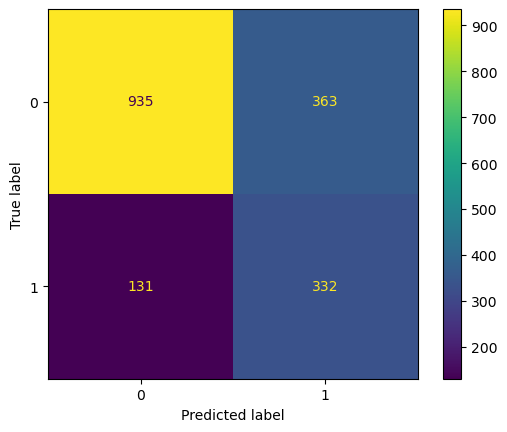

In [41]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

Looks like we managed to improve the performance of the model as the kappa score is now 0.48. All the values improved except for recall. We will apply SMOTE as well to this set.

In [42]:
sm = SMOTE(random_state=100,k_neighbors=3) #neighbors used to try to predict the class.
X2_train_SMOTE,y2_train_SMOTE = sm.fit_resample(X2_train_scaled,y2_train)

print(X2_train.shape)
print(X2_train_SMOTE.shape)

(5274, 41)
(7704, 41)


In [43]:
y2_train_SMOTE.value_counts()

0    3852
1    3852
Name: churn_Yes, dtype: int64

In [44]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X2_train_SMOTE, y2_train_SMOTE)
y2_pred_test = lr.predict(X2_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y2_test,y2_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y2_test,y2_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y2_test,y2_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y2_test,y2_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y2_test,y2_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.79
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.45


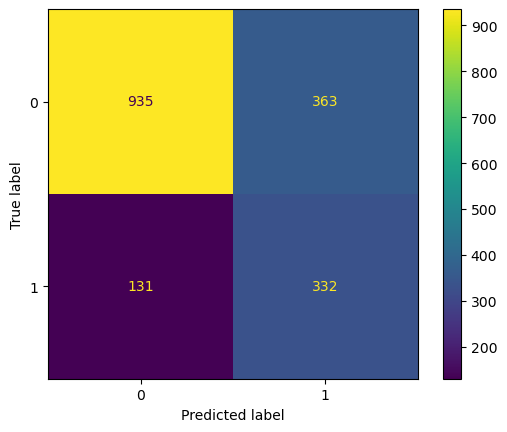

In [45]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

<br><h1>These are the final results for all models. We can see that keeping all categoricals ensures a better performance as the kappa score reflects.<h1>

**Encoded categoricals and SMOTE:**<br>
The accuracy in the TEST set is: 0.75<br>
The precision in the TEST set is: 0.51<br>
The recall in the TEST set is: 0.79<br>
The F1 in the TEST set is: 0.62<br>
The Kappa in the TEST set is: 0.45<br>

**Encoded categoricals:**<br>
The accuracy in the TEST set is: 0.81<br>
The precision in the TEST set is: 0.65<br>
The recall in the TEST set is: 0.55<br>
The F1 in the TEST set is: 0.60<br>
The Kappa in the TEST set is: 0.48<br>

**Previous score (SMOTE):**<br>
The accuracy in the TEST set is: 0.72<br>
The precision in the TEST set is: 0.48<br>
The recall in the TEST set is: 0.72<br>
The F1 in the TEST set is: 0.57<br>
The Kappa in the TEST set is: 0.38<br>

**Original score:**<br>
The accuracy in the TEST set is: 0.78<br>
The precision in the TEST set is: 0.61<br>
The recall in the TEST set is: 0.46<br>
The F1 in the TEST set is: 0.52<br>
The Kappa in the TEST set is: 0.38<br>